In [34]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from src.preprocessing import Preprocessor
from catboost import CatBoostRegressor
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
dataset = pd.read_csv("data/pf_suvs_i302_1s2025.csv")

In [99]:
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
val, test = train_test_split(test, test_size=0.5, random_state=42)

In [100]:
preprocessor = Preprocessor(train)

In [101]:
train = preprocessor.preprocess(train)

In [102]:
val = preprocessor.preprocess(val)

In [103]:
x_train = train.drop(columns=["Precio"])
y_train = train["Precio"]

x_val = val.drop(columns=["Precio"])
y_val = val["Precio"]

# M0

In [41]:
M0 = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.05,
    depth=8,    
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    text_features=['Versión', 'Título', 'Descripción'], 
    bootstrap_type= 'Bernoulli',
    subsample=0.75, 
    min_data_in_leaf=10,
    colsample_bylevel=0.75, 
)

M0.fit(
    x_train, y_train,
    eval_set=(x_val, y_val),
    use_best_model=True,
    early_stopping_rounds=100
)

0:	learn: 19531.1661468	test: 21857.9034246	best: 21857.9034246 (0)	total: 600ms	remaining: 14m 59s
100:	learn: 7588.7693224	test: 9164.0971265	best: 9164.0971265 (100)	total: 1m 7s	remaining: 15m 40s
200:	learn: 6251.5457314	test: 7839.8968897	best: 7838.4249880 (199)	total: 2m 13s	remaining: 14m 20s
300:	learn: 5462.3994826	test: 7164.5655153	best: 7164.5655153 (300)	total: 3m 19s	remaining: 13m 14s
400:	learn: 4922.8831580	test: 6716.9103145	best: 6716.9103145 (400)	total: 4m 24s	remaining: 12m 5s
500:	learn: 4580.0232875	test: 6413.5192390	best: 6413.5192390 (500)	total: 5m 27s	remaining: 10m 52s
600:	learn: 4293.1943127	test: 6248.9817849	best: 6248.9817849 (600)	total: 6m 31s	remaining: 9m 46s
700:	learn: 4081.0068614	test: 6083.0924881	best: 6083.0924881 (700)	total: 7m 30s	remaining: 8m 33s
800:	learn: 3893.2360376	test: 5923.5242577	best: 5923.5242577 (800)	total: 8m 34s	remaining: 7m 28s
900:	learn: 3723.1088629	test: 5806.2061431	best: 5806.2061431 (900)	total: 9m 36s	remain

## Validación

In [42]:
y_pred_M0 = M0.predict(x_val)
mse_M0 = mean_squared_error(y_val, y_pred_M0)
rmse_M0 = mse_M0 ** 0.5
print(f"Root Mean Squared Error: {rmse_M0}")

r2_M0 = r2_score(y_val, y_pred_M0)
print(f"R^2 Score: {r2_M0}")

mae_M0 = mean_absolute_error(y_val, y_pred_M0)
print(f"Mean Absolute Error: {mae_M0}")

Root Mean Squared Error: 5510.293809266538
R^2 Score: 0.9395135547165873
Mean Absolute Error: 2645.880346249927


## Entrenamiento

In [43]:
y_pred_train_M0 = M0.predict(x_train)
mse_train_M0 = mean_squared_error(y_train, y_pred_train_M0)
rmse_train_M0 = mse_train_M0 ** 0.5
print(f"Train Root Mean Squared Error: {rmse_train_M0}")
r2_train_M0 = r2_score(y_train, y_pred_train_M0)
print(f"Train R^2 Score: {r2_train_M0}")
mae_train_M0 = mean_absolute_error(y_train, y_pred_train_M0)
print(f"Train Mean Absolute Error: {mae_train_M0}")

Train Root Mean Squared Error: 3071.257953611578
Train R^2 Score: 0.9767664836771189
Train Mean Absolute Error: 2086.4624227129316


# M1

In [44]:
M1 = CatBoostRegressor(
    iterations=1500,
    learning_rate=0.1,
    depth=8,    
    loss_function='RMSE',
    eval_metric='RMSE',
    random_seed=42,
    verbose=100,
    text_features=['Versión', 'Título', 'Descripción'], 
    bootstrap_type= 'Bernoulli',
    subsample=0.75, 
    min_data_in_leaf=10,
    colsample_bylevel=0.75, 
)

M1.fit(
    x_train, y_train,
    eval_set=(x_val, y_val),
    use_best_model=True,
    early_stopping_rounds=100
)

0:	learn: 18924.7010482	test: 21319.0712408	best: 21319.0712408 (0)	total: 531ms	remaining: 13m 15s
100:	learn: 6316.3700236	test: 6844.3005265	best: 6844.3005265 (100)	total: 1m 4s	remaining: 14m 56s
200:	learn: 4962.4457041	test: 5893.1879578	best: 5893.1879578 (200)	total: 2m 10s	remaining: 14m
300:	learn: 4274.4516693	test: 5468.1610868	best: 5468.1610868 (300)	total: 3m 16s	remaining: 13m 1s
400:	learn: 3853.3669263	test: 5257.3644439	best: 5256.4290624 (399)	total: 4m 23s	remaining: 12m
500:	learn: 3523.4732276	test: 5092.0160414	best: 5092.0160414 (500)	total: 5m 18s	remaining: 10m 34s
600:	learn: 3273.1034189	test: 5003.4395468	best: 5003.4395468 (600)	total: 6m 13s	remaining: 9m 18s
700:	learn: 3063.6668159	test: 4960.7306637	best: 4960.7306637 (700)	total: 7m 7s	remaining: 8m 7s
800:	learn: 2893.5616736	test: 4911.4189051	best: 4905.7936677 (782)	total: 8m 2s	remaining: 7m
900:	learn: 2749.0442503	test: 4859.1501149	best: 4858.6773839 (897)	total: 8m 57s	remaining: 5m 57s
100

In [45]:
print(M1.get_all_params())

{'nan_mode': 'Min', 'eval_metric': 'RMSE', 'iterations': 1500, 'sampling_frequency': 'PerTree', 'leaf_estimation_method': 'Newton', 'od_pval': 0, 'random_score_type': 'NormalWithModelSizeDecrease', 'grow_policy': 'SymmetricTree', 'penalties_coefficient': 1, 'boosting_type': 'Plain', 'model_shrink_mode': 'Constant', 'feature_border_type': 'GreedyLogSum', 'bayesian_matrix_reg': 0.10000000149011612, 'eval_fraction': 0, 'force_unit_auto_pair_weights': False, 'l2_leaf_reg': 3, 'random_strength': 1, 'od_type': 'Iter', 'rsm': 0.75, 'boost_from_average': True, 'model_size_reg': 0.5, 'pool_metainfo_options': {'tags': {}}, 'subsample': 0.75, 'use_best_model': True, 'od_wait': 100, 'random_seed': 42, 'depth': 8, 'posterior_sampling': False, 'border_count': 254, 'classes_count': 0, 'auto_class_weights': 'None', 'sparse_features_conflict_fraction': 0, 'leaf_estimation_backtracking': 'AnyImprovement', 'best_model_min_trees': 1, 'model_shrink_rate': 0, 'min_data_in_leaf': 10, 'text_processing': {'dic

## Validación

In [46]:
y_pred_M1 = M1.predict(x_val)
mse_M1 = mean_squared_error(y_val, y_pred_M1)
rmse_M1 = mse_M1 ** 0.5
print(f"Root Mean Squared Error: {rmse_M1}")

r2_M1 = r2_score(y_val, y_pred_M1)
print(f"R^2 Score: {r2_M1}")

mae_M1 = mean_absolute_error(y_val, y_pred_M1)
print(f"Mean Absolute Error: {mae_M1}")

Root Mean Squared Error: 4718.136240035194
R^2 Score: 0.9556545052257317
Mean Absolute Error: 2308.3116783164974


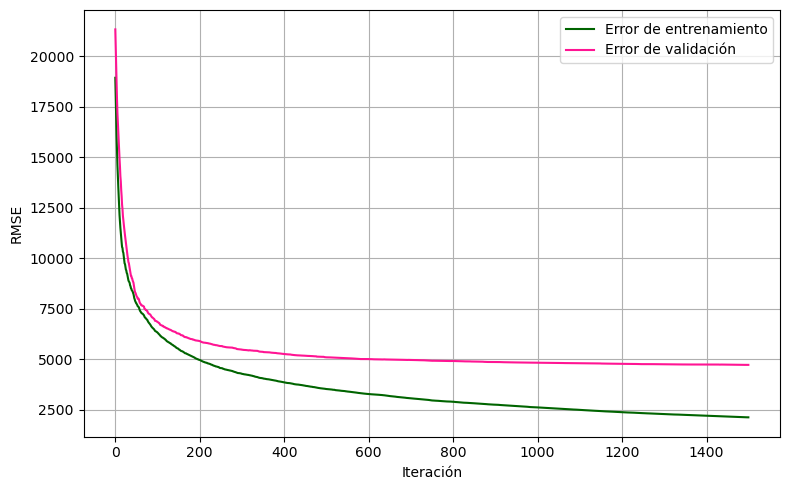

In [47]:
evals_result = M1.get_evals_result()
train_loss = evals_result['learn']['RMSE']
valid_loss = evals_result['validation']['RMSE']
plt.figure(figsize=(8, 5))
plt.plot(train_loss, label='Error de entrenamiento', color='darkgreen')
plt.plot(valid_loss, label='Error de validación', color='deeppink')
plt.xlabel('Iteración')
plt.ylabel('RMSE')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Entrenamiento

In [48]:
y_pred_train_M1 = M1.predict(x_train)
mse_train_M1 = mean_squared_error(y_train, y_pred_train_M1)
rmse_train_M1 = mse_train_M1 ** 0.5
print(f"Train Root Mean Squared Error: {rmse_train_M1}")
r2_train_M1 = r2_score(y_train, y_pred_train_M1)
print(f"Train R^2 Score: {r2_train_M1}")
mae_train_M1 = mean_absolute_error(y_train, y_pred_train_M1)
print(f"Train Mean Absolute Error: {mae_train_M1}")

Train Root Mean Squared Error: 2124.705921719705
Train R^2 Score: 0.9888806343406144
Train Mean Absolute Error: 1542.1433005106464


## Test

In [104]:
test = preprocessor.preprocess(test)

In [105]:
x_test = test.drop(columns=["Precio"])
y_test = test["Precio"]

In [107]:
y_pred_test_M1 = M1.predict(x_test)
mse_test_M1 = mean_squared_error(y_test, y_pred_test_M1)
rmse_test_M1 = mse_test_M1 ** 0.5
print(f"Test Root Mean Squared Error: {rmse_test_M1}")
r2_test_M1 = r2_score(y_test, y_pred_test_M1)
print(f"Test R^2 Score: {r2_test_M1}")
mae_test_M1 = mean_absolute_error(y_test, y_pred_test_M1)
print(f"Test Mean Absolute Error: {mae_test_M1}")

Test Root Mean Squared Error: 5839.751818121572
Test R^2 Score: 0.9113677064420388
Test Mean Absolute Error: 2425.6835799511928


103.22923093192523 5838.839355825382


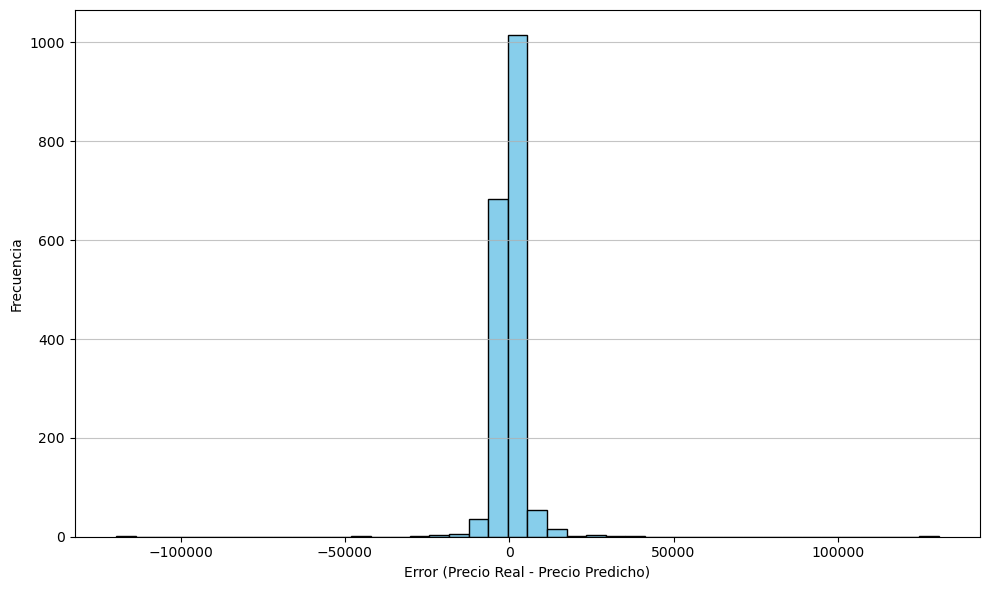

In [52]:
errors = y_test - y_pred_test_M1
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=int(np.sqrt(len(y_pred_test_M1))), color='skyblue', edgecolor='black')
print(np.mean(errors), np.std(errors))
plt.xlabel('Error (Precio Real - Precio Predicho)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, errors, alpha=0.5, color='blue')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Precio Real')
plt.ylabel('Error (Precio Real - Precio Predicho)')
plt.grid()
plt.tight_layout()
plt.show()

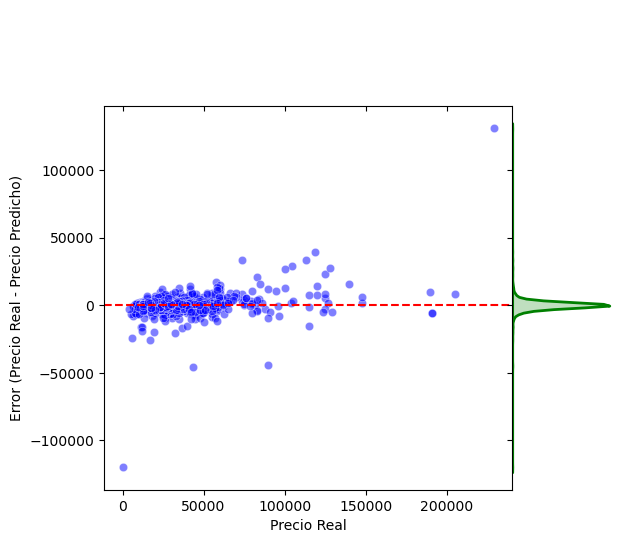

In [ ]:
import seaborn as sns

mu = np.mean(errors)
std = np.std(errors)
g = sns.JointGrid(x=y_test, y=errors, height=6, ratio=4, space=0)
g.plot_joint(sns.scatterplot, color="blue", alpha=0.5)
g.ax_joint.axhline(0, color='red', linestyle='--')
sns.kdeplot(y=errors, ax=g.ax_marg_y, color='green', lw=2, fill=True)
g.ax_marg_y.set_xticks([])
g.ax_marg_y.set_ylabel("")
g.set_axis_labels("Precio Real", "Error (Precio Real - Precio Predicho)")
plt.subplots_adjust(top=0.9, bottom=0.1, left=0.1, right=0.95)
plt.show()

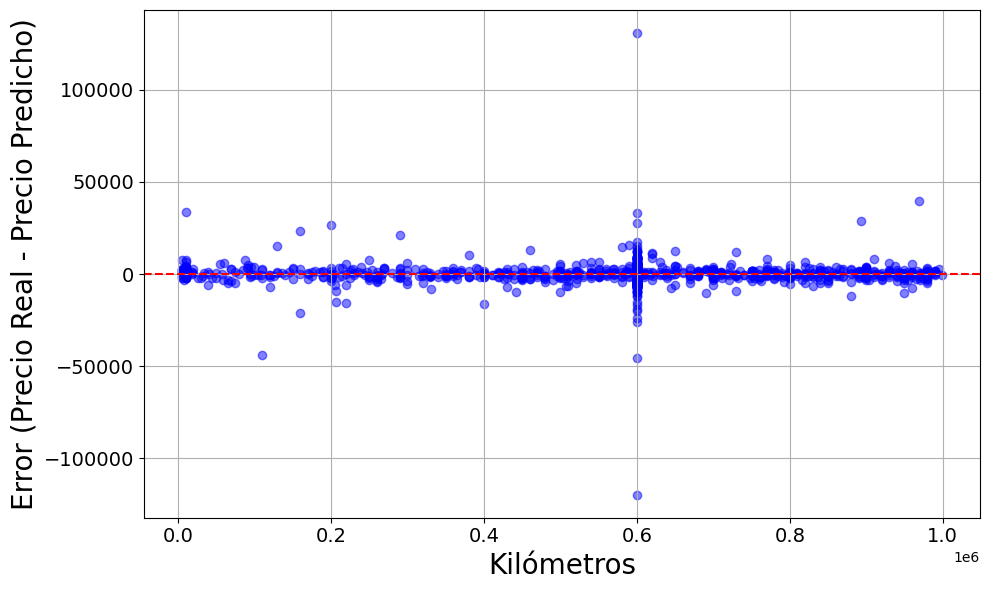

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(test['Kilómetros'], errors, alpha=0.5, color='blue')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Kilómetros', fontsize=20)
plt.ylabel('Error (Precio Real - Precio Predicho)', fontsize=20)
plt.grid()
plt.tight_layout()
plt.show()

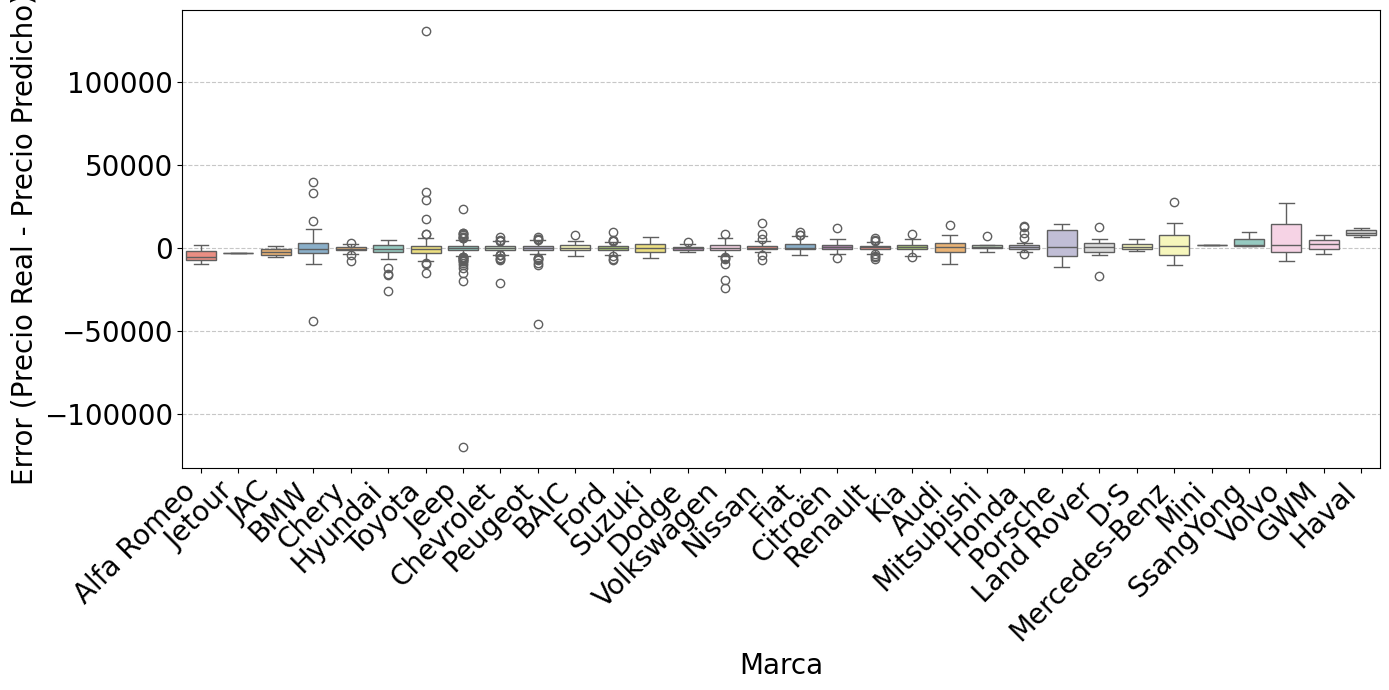

In [ ]:
from src.knowns import KNOWN_BRANDS

brand_cols = [col for col in test.columns if col in KNOWN_BRANDS]
marcas = test[brand_cols].idxmax(axis=1)
medianas = pd.Series(errors).groupby(marcas).median().sort_values()
orden_marcas = medianas.index
plt.figure(figsize=(14, 7))
sns.boxplot(
    x=marcas, y=errors, order=orden_marcas,
    hue=marcas, palette='Set3', dodge=False, legend=False
)
plt.xlabel('Marca', fontsize=20)
plt.ylabel('Error (Precio Real - Precio Predicho)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

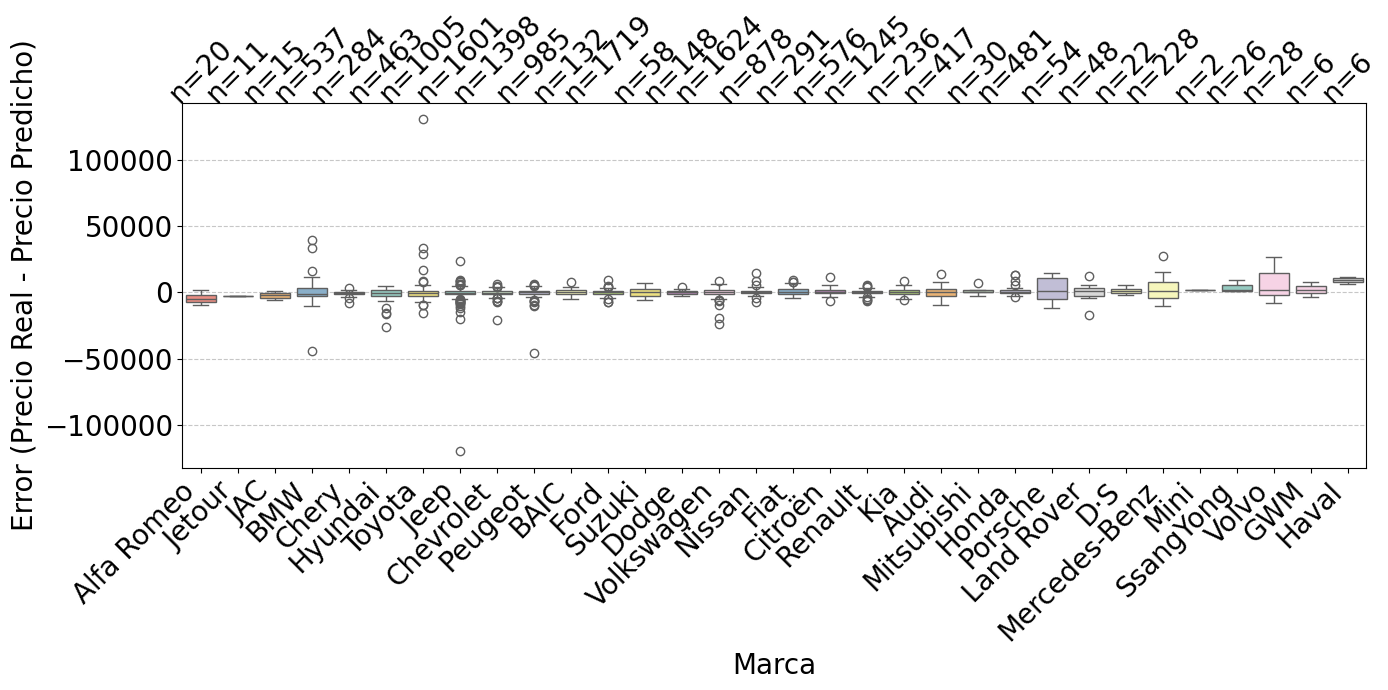

In [144]:
# 1. Obtener marcas del set de test
brand_cols = [col for col in test.columns if col in KNOWN_BRANDS]
marcas_test = test[brand_cols].idxmax(axis=1)

# 2. Obtener orden por mediana de error
medianas = pd.Series(errors).groupby(marcas_test).median().sort_values()
orden_marcas = medianas.index

# 3. Contar muestras por marca en el set de train
brand_cols_train = [col for col in train.columns if col in KNOWN_BRANDS]
marcas_train = train[brand_cols_train].idxmax(axis=1)
conteos_train = marcas_train.value_counts()

# 4. Hacer el gráfico con boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(
    x=marcas_test, y=errors, order=orden_marcas,
    hue=marcas_test, palette='Set3', dodge=False, legend=False
)

# 5. Etiquetas con la cantidad de muestras del train encima de cada boxplot
for i, marca in enumerate(orden_marcas):
    count = conteos_train.get(marca, 0)  # puede no estar
    plt.text(i, plt.ylim()[1] * 1, f'n={count}', ha='center', color='black', rotation=45, fontsize=20)

# 6. Estética
plt.xlabel('Marca', fontsize=20)
plt.ylabel('Error (Precio Real - Precio Predicho)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

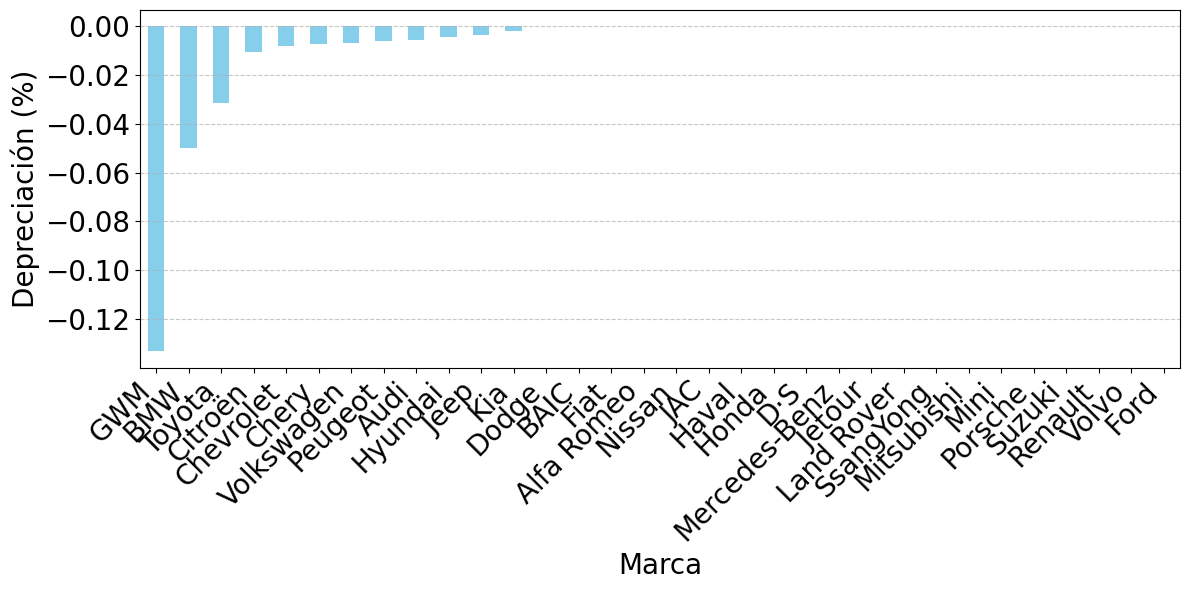

In [152]:
from src.depreciation_per_km import estimate_depreciation_per_km

depreciation_per_km = estimate_depreciation_per_km(x_test, 175, M1)
df_depreciation = pd.DataFrame({'Marca': marcas, 'Depreciacion': depreciation_per_km})
promedio_por_marca = df_depreciation.groupby('Marca')['Depreciacion'].mean().sort_values()
plt.figure(figsize=(12, 6))
promedio_por_marca.plot(kind='bar', color='skyblue')
plt.xlabel('Marca', fontsize=20)
plt.ylabel('Depreciación (%)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

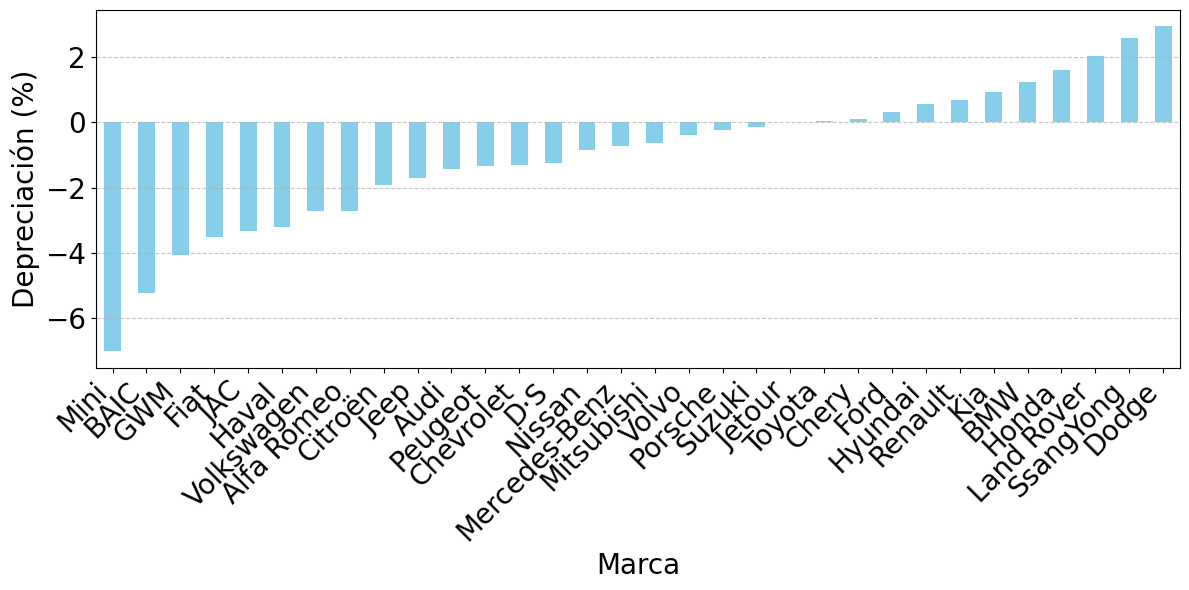

In [153]:
depreciation_per_km = estimate_depreciation_per_km(x_test, 176, M1)
df_depreciation = pd.DataFrame({'Marca': marcas, 'Depreciacion': depreciation_per_km})
promedio_por_marca = df_depreciation.groupby('Marca')['Depreciacion'].mean().sort_values()
plt.figure(figsize=(12, 6))
promedio_por_marca.plot(kind='bar', color='skyblue')
plt.xlabel('Marca', fontsize=20)
plt.ylabel('Depreciación (%)', fontsize=20)
plt.xticks(rotation=45, ha='right', fontsize=20)
plt.yticks(fontsize=20)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()